In [1]:
import numpy as np
import pandas as pd


In [2]:
import pandas as pd


encodings = ['utf-8', 'latin1', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('email_spam.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass


the basic dataframe line kept giving errors so, tried this code segment after google research which worked. 

In [3]:
df.sample(5)


,subject,message,label
698,contragram 1997,quarterly newsletter of the contrastive gramma...,0
773,sociolinguistics & anthropological linguistics,codes and consequences : choosing linguistic v...,0
2285,russian lecturer position at cornell,russian lecturer position position : full - ti...,0
258,NaN,phonology & phonetics leiden in last : hil pho...,0
1464,"new books in semantics , pragmatics , & philos...",aspect and predication : the semantics of argu...,0


In [4]:
df.shape

(2893, 3)

#  1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


Drop the unnecessary columns

In [6]:
df.drop(columns=['subject'],inplace=True)

In [7]:
df.sample(5)

,message,label
1129,dear linguists ! can anyone please help me in ...,0
2467,"glot international , volume 3 ( 1998 ) , issue...",0
2205,version 1 . 5 of the bibliography of work on o...,0
278,* * * this is not spam ! * * * my name is matt...,1
2329,we would like to inform the members of linguis...,0


Renaming the cols

In [8]:
df.rename(columns={'label':'prediction','message':'text'},inplace=True)

In [9]:
df.sample(5)

,text,prediction
2137,a bibliography of work on language and power h...,0
1896,join us at pink pussy club the hottest site fo...,1
851,generative approaches to second language acqui...,0
1481,final call for papers fsmnlp ' 98 internationa...,0
2662,editor 's note : we received the following cor...,0


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['prediction'] = encoder.fit_transform(df['prediction'])
df.head()

,text,prediction
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


Missing value check

In [11]:
df.isnull().sum()

text          0
prediction    0
dtype: int64

Duplicate value check

In [12]:
df.duplicated().sum()

34

In [13]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(2859, 2)

## 2. EDA

In [15]:
df.head()

,text,prediction
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [16]:
df['prediction'].value_counts()

prediction
0    2401
1     458
Name: count, dtype: int64

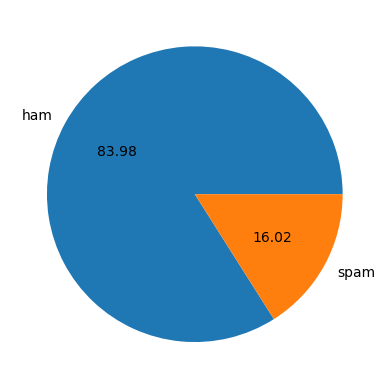

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['prediction'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data seems to be imbalanced

In [18]:
import nltk


In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['characters'] = df['text'].apply(len)

In [22]:
df.head()

,text,prediction,characters
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [23]:

df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,text,prediction,characters,words
0,content - length : 3386 apple-iss research cen...,0,2856,584
1,"lang classification grimes , joseph e . and ba...",0,1800,344
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280
3,a colleague and i are researching the differin...,0,324,60
4,earlier this morning i was on the phone with a...,0,1046,232


In [25]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,text,prediction,characters,words,sentences
0,content - length : 3386 apple-iss research cen...,0,2856,584,22
1,"lang classification grimes , joseph e . and ba...",0,1800,344,35
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19
3,a colleague and i are researching the differin...,0,324,60,4
4,earlier this morning i was on the phone with a...,0,1046,232,12


In [27]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,2859.000000,2859.000000,2859.000000
mean,3222.404687,672.205666,44.373207
std,3651.176740,804.305617,83.196999
min,17.000000,3.000000,1.000000
25%,954.500000,194.500000,11.000000
50%,2026.000000,401.000000,21.000000
75%,4015.000000,822.000000,45.000000
max,28649.000000,6608.000000,1500.000000


In [28]:
# ham
df[df['prediction'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,2401.000000,2401.000000,2401.000000
mean,3118.416910,627.902124,41.231570
std,3275.948508,680.684041,82.375965
min,17.000000,3.000000,1.000000
25%,1027.000000,205.000000,11.000000
50%,2059.000000,401.000000,20.000000
75%,3884.000000,784.000000,41.000000
max,28649.000000,6608.000000,1500.000000


In [29]:
#spam
df[df['prediction'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,458.000000,458.000000,458.000000
mean,3767.545852,904.460699,60.842795
std,5162.941505,1244.198407,85.598507
min,46.000000,13.000000,1.000000
25%,624.250000,140.250000,12.000000
50%,1680.000000,398.500000,25.500000
75%,4910.250000,1150.500000,72.000000
max,28571.000000,6586.000000,483.000000


In [30]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

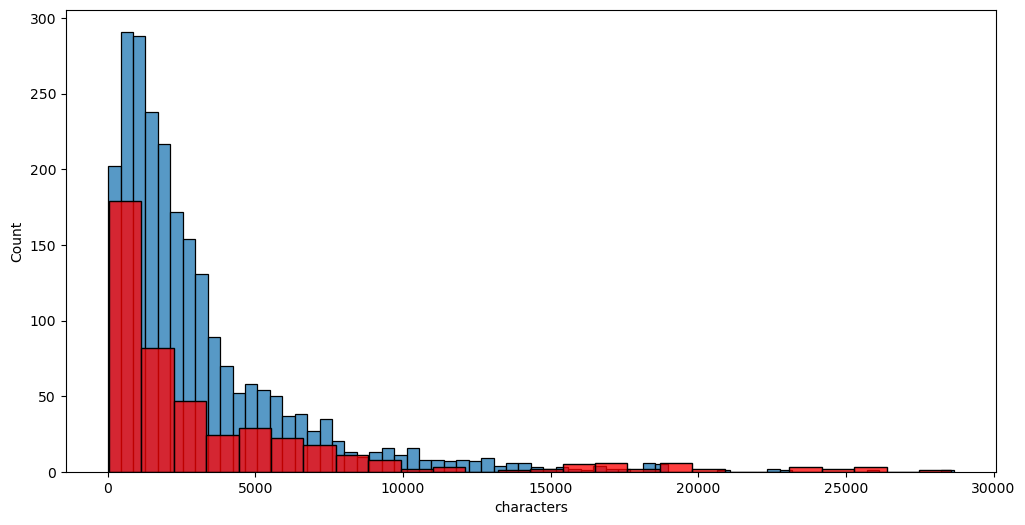

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['prediction'] == 0]['characters'])
sns.histplot(df[df['prediction'] == 1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

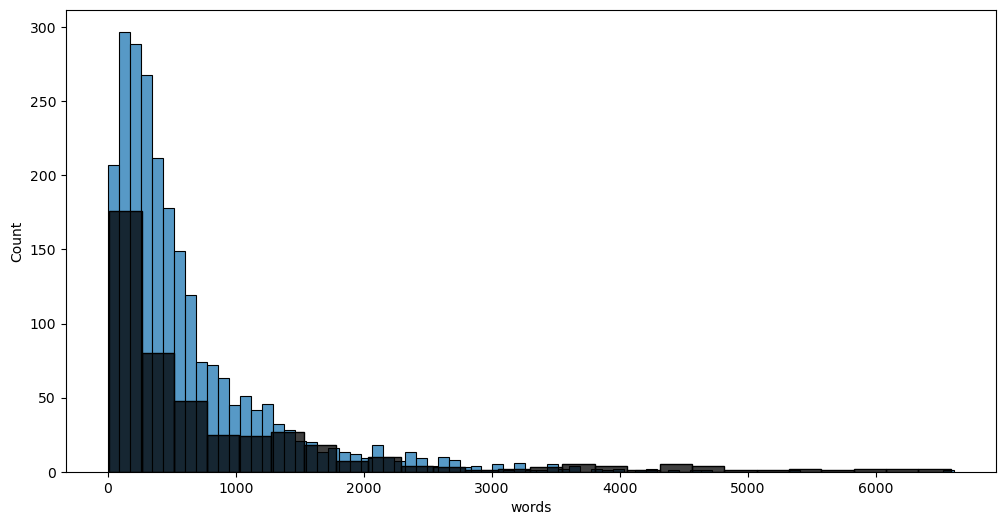

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['prediction'] == 0]['words'])
sns.histplot(df[df['prediction'] == 1]['words'],color='black')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


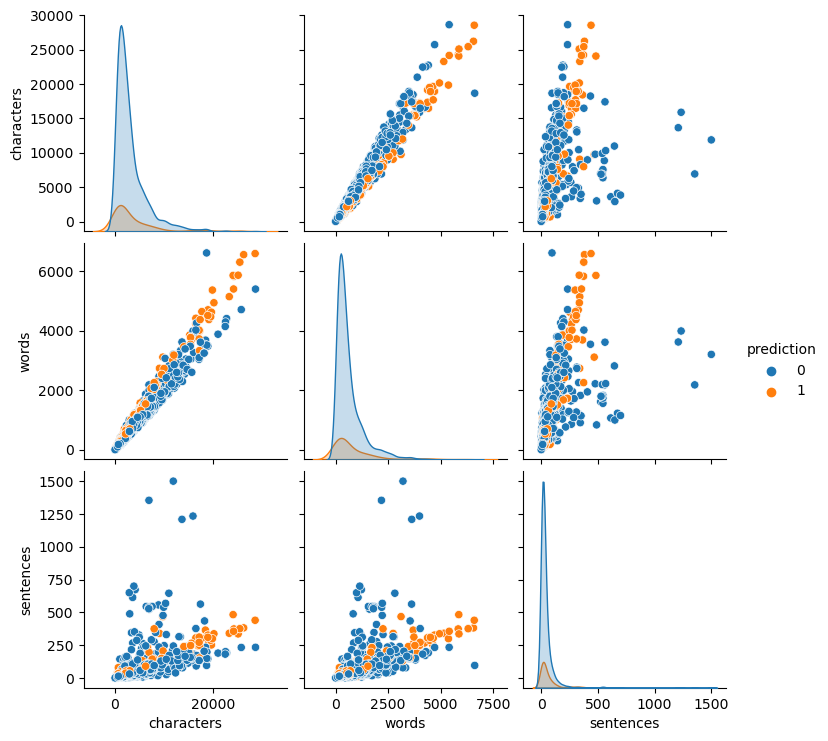

In [33]:
sns.pairplot(df,hue='prediction')

<Axes: >

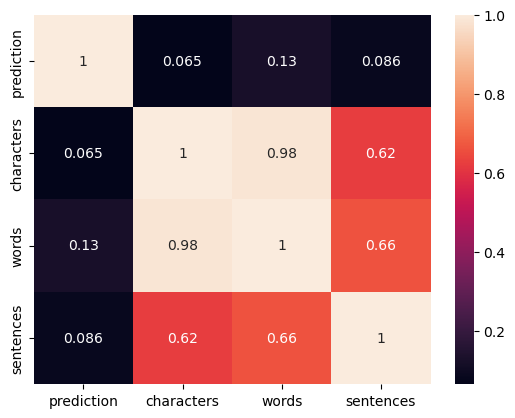

In [34]:
numeric_columns = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)


# 3. Data Preprocessing
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import re

def detect_spam_words(text):
    words = text.split()  # Split the text into words
    
    fixed_words = []
    current_fixed_word = ""

    for word in words:
        # Check if the word contains '/' or '*'
        if '/' in word or '*' in word:
            # Remove '/' and '*' characters and append the word to the current fixed word
            current_fixed_word += re.sub(r'[/\*]', '', word)
        else:
            # If it's not a word containing '/', add the current fixed word (if any) to the list
            if current_fixed_word:
                fixed_words.append(current_fixed_word)
                current_fixed_word = ""  # Reset the current fixed word
            fixed_words.append(word)

    # Append the last current fixed word (if any) to the list
    if current_fixed_word:
        fixed_words.append(current_fixed_word)

    return ' '.join(fixed_words)

#in dataset,pal es tine
#now palestine

In [37]:
detect_spam_words("I support pal/es*tine")

'I support palestine'

In [38]:
df['detect_text'] = df['text'].apply(detect_spam_words)

In [39]:
df.head()

,text,prediction,characters,words,sentences,detect_text
0,content - length : 3386 apple-iss research cen...,0,2856,584,22,content - length : 3386 apple-iss research cen...
1,"lang classification grimes , joseph e . and ba...",0,1800,344,35,"lang classification grimes , joseph e . and ba..."
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19,i am posting this inquiry for sergei atamas ( ...
3,a colleague and i are researching the differin...,0,324,60,4,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,1046,232,12,earlier this morning i was on the phone with a...


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(detect_text):
    if isinstance(detect_text, str):
        detect_text = detect_text.lower()
        detect_text = nltk.word_tokenize(detect_text)

        y = []
        for i in detect_text:
            if i.isalnum():
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            y.append(ps.stem(i))

        return " ".join(y)
    else:
        return ""  # Return an empty string if 'detect_text' is not a string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

'groningen assembly on language acquisition 1995 university of groningen the netherlands 7 - 9 september 1995 the conference aims to bring together researchers willing to discuss the merits and constraints of different theoretical approaches to language acquisition , in particular generative linguistics , constructionism , dynamic systems modelling , and connectionism . invited speakers harald clahsen university of essex annette karmiloff - smith mrc london kim plunkett university of oxford luigi rizzi university of geneva paul van geert university of groningen abstract submissions abstracts may cover all aspects of language acquisition relating to the core areas of linguistics , including phonology , morphology , syntax , semantics and the interfaces . selection of abstracts will be based on not only their quality but also their potential to contribute to the conference \'s interactive objective . abstract submissions should include : 1 . five ( 5 ) copies of a one-page , double-space

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [44]:
df['transformed_text'] = df['detect_text'].apply(transform_text)

In [45]:
df.head()

,text,prediction,characters,words,sentences,detect_text,transformed_text
0,content - length : 3386 apple-iss research cen...,0,2856,584,22,content - length : 3386 apple-iss research cen...,content length 3386 research center us 10 mill...
1,"lang classification grimes , joseph e . and ba...",0,1800,344,35,"lang classification grimes , joseph e . and ba...",lang classif grime joseph e barbara f grime et...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19,i am posting this inquiry for sergei atamas ( ...,post inquiri sergei atama satama umabnet ab um...
3,a colleague and i are researching the differin...,0,324,60,4,a colleague and i are researching the differin...,colleagu research differ degre risk perceiv ho...
4,earlier this morning i was on the phone with a...,0,1046,232,12,earlier this morning i was on the phone with a...,earlier morn phone friend mine live south amer...


WordCloud

In [46]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['prediction'] == 1]['transformed_text'].str.cat(sep=" "))


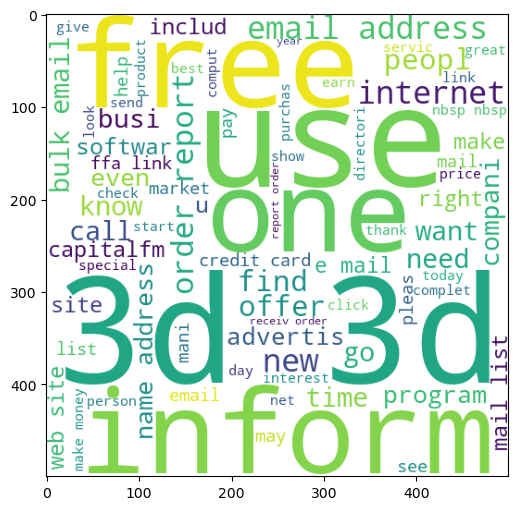

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['prediction'] == 0]['transformed_text'].str.cat(sep=" "))


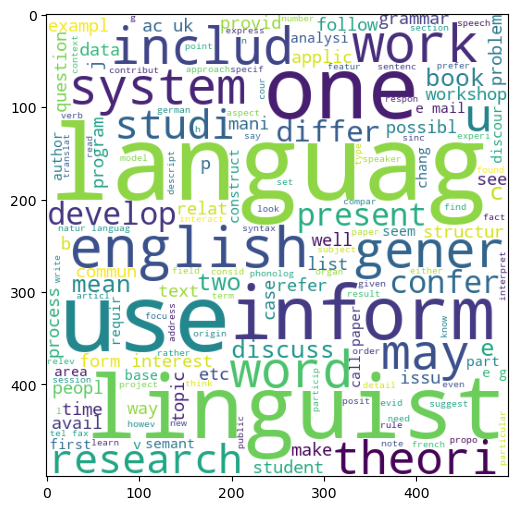

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()


,text,prediction,characters,words,sentences,detect_text,transformed_text
0,content - length : 3386 apple-iss research cen...,0,2856,584,22,content - length : 3386 apple-iss research cen...,content length 3386 research center us 10 mill...
1,"lang classification grimes , joseph e . and ba...",0,1800,344,35,"lang classification grimes , joseph e . and ba...",lang classif grime joseph e barbara f grime et...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19,i am posting this inquiry for sergei atamas ( ...,post inquiri sergei atama satama umabnet ab um...
3,a colleague and i are researching the differin...,0,324,60,4,a colleague and i are researching the differin...,colleagu research differ degre risk perceiv ho...
4,earlier this morning i was on the phone with a...,0,1046,232,12,earlier this morning i was on the phone with a...,earlier morn phone friend mine live south amer...


In [52]:
spam_corpus = []
for msg in df[df['prediction'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [53]:
len(spam_corpus)


146419

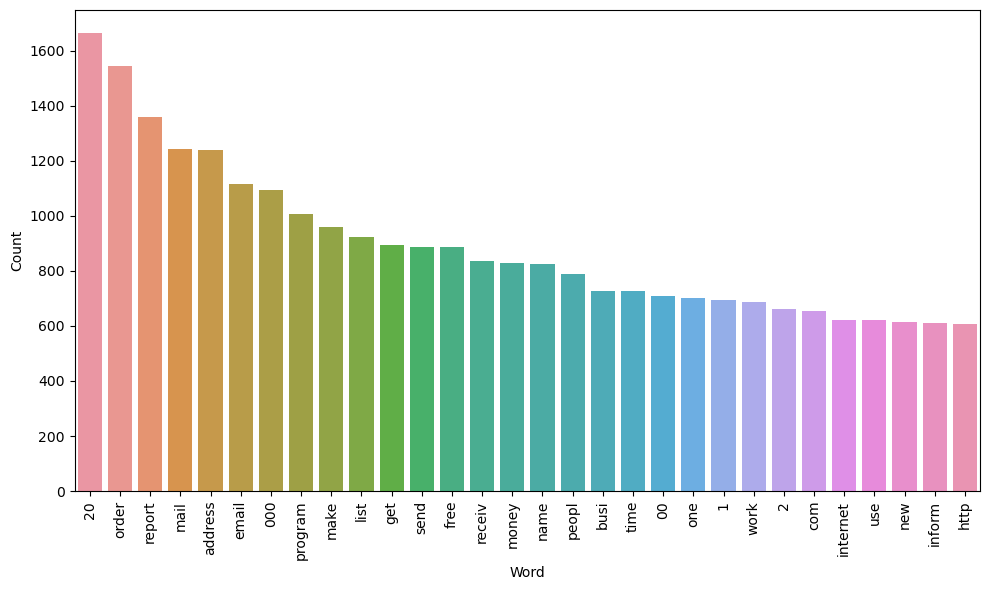

In [54]:
from collections import Counter

# Assuming spam_corpus contains the list of words as generated previously

# Create a Counter object to count word occurrences
word_counter = Counter(spam_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['prediction'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)


695643

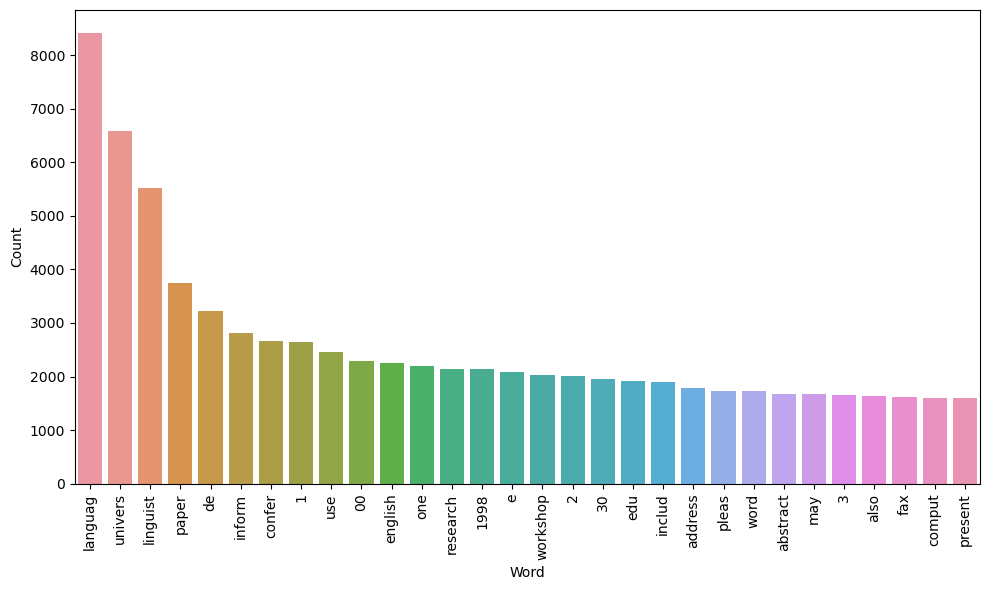

In [57]:
from collections import Counter

# Assuming ham_corpus contains the list of words

# Create a Counter object to count word occurrences in ham_corpus
word_counter = Counter(ham_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


# Text Vectorization
# using Bag of Words


In [58]:
df.head()


,text,prediction,characters,words,sentences,detect_text,transformed_text
0,content - length : 3386 apple-iss research cen...,0,2856,584,22,content - length : 3386 apple-iss research cen...,content length 3386 research center us 10 mill...
1,"lang classification grimes , joseph e . and ba...",0,1800,344,35,"lang classification grimes , joseph e . and ba...",lang classif grime joseph e barbara f grime et...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19,i am posting this inquiry for sergei atamas ( ...,post inquiri sergei atama satama umabnet ab um...
3,a colleague and i are researching the differin...,0,324,60,4,a colleague and i are researching the differin...,colleagu research differ degre risk perceiv ho...
4,earlier this morning i was on the phone with a...,0,1046,232,12,earlier this morning i was on the phone with a...,earlier morn phone friend mine live south amer...


# 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape


(2859, 3000)

In [64]:
y = df['prediction'].values


In [65]:
from sklearn.model_selection import train_test_split


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9527972027972028
[[468   5]
 [ 22  77]]
0.9390243902439024


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9947552447552448
[[472   1]
 [  2  97]]
0.9897959183673469


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9842657342657343
[[473   0]
 [  9  90]]
1.0


In [72]:
# Run this cell in your Jupyter Notebook
!pip install xgboost


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, recall


In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.993006993006993, 0.9896907216494846, 0.9696969696969697)

In [78]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)


For  SVC
Accuracy -  0.993006993006993
Precision -  0.9896907216494846
Recall -  0.9696969696969697
For  KN
Accuracy -  0.9772727272727273
Precision -  0.9479166666666666
Recall -  0.9191919191919192
For  NB
Accuracy -  0.9947552447552448
Precision -  0.9897959183673469
Recall -  0.9797979797979798
For  DT
Accuracy -  0.958041958041958
Precision -  0.9518072289156626
Recall -  0.797979797979798
For  LR
Accuracy -  0.972027972027972
Precision -  1.0
Recall -  0.8383838383838383
For  RF
Accuracy -  0.9895104895104895
Precision -  1.0
Recall -  0.9393939393939394
For  AdaBoost
Accuracy -  0.9895104895104895
Precision -  0.9894736842105263
Recall -  0.9494949494949495
For  BgC
Accuracy -  0.9702797202797203
Precision -  0.9767441860465116
Recall -  0.8484848484848485
For  ETC
Accuracy -  0.9790209790209791
Precision -  1.0
Recall -  0.8787878787878788
For  GBDT
Accuracy -  0.972027972027972
Precision -  0.9882352941176471
Recall -  0.8484848484848485
For  xgb
Accuracy -  0.993006993006993


In [79]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}).sort_values('Precision', ascending=False)


In [80]:
performance_df


,Algorithm,Accuracy,Precision,Recall
4,LR,0.972028,1.000000,0.838384
5,RF,0.989510,1.000000,0.939394
8,ETC,0.979021,1.000000,0.878788
2,NB,0.994755,0.989796,0.979798
0,SVC,0.993007,0.989691,0.969697
10,xgb,0.993007,0.989691,0.969697
6,AdaBoost,0.989510,0.989474,0.949495
9,GBDT,0.972028,0.988235,0.848485
7,BgC,0.970280,0.976744,0.848485
3,DT,0.958042,0.951807,0.797980


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [82]:
performance_df1


,Algorithm,variable,value
0,LR,Accuracy,0.972028
1,RF,Accuracy,0.989510
2,ETC,Accuracy,0.979021
3,NB,Accuracy,0.994755
4,SVC,Accuracy,0.993007
5,xgb,Accuracy,0.993007
6,AdaBoost,Accuracy,0.989510
7,GBDT,Accuracy,0.972028
8,BgC,Accuracy,0.970280
9,DT,Accuracy,0.958042


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


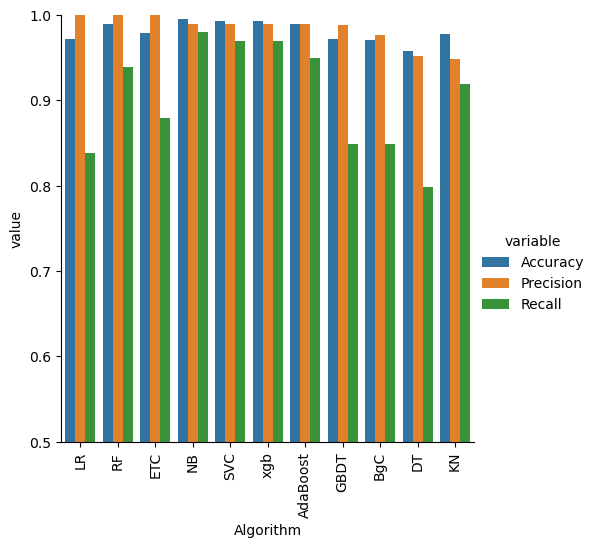

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Assuming performance_df1 contains columns: 'Algorithm', 'variable', 'value'
# Filter the DataFrame to get Precision and Recall values
precision_recall_df = performance_df1[performance_df1['variable'].isin(['Precision', 'Recall'])]

# Pivot the DataFrame to have Precision and Recall as separate columns
pivot_precision_recall = precision_recall_df.pivot(index='Algorithm', columns='variable', values='value').reset_index()

# Calculate F1 score
pivot_precision_recall['F1 Score'] = 2 * (pivot_precision_recall['Precision'] * pivot_precision_recall['Recall']) / (pivot_precision_recall['Precision'] + pivot_precision_recall['Recall'])

# Display the DataFrame with Precision, Recall, and F1 scores
print(pivot_precision_recall[['Algorithm', 'Precision', 'Recall', 'F1 Score']])


variable Algorithm  Precision    Recall  F1 Score
0         AdaBoost   0.989474  0.949495  0.969072
1              BgC   0.976744  0.848485  0.908108
2               DT   0.951807  0.797980  0.868132
3              ETC   1.000000  0.878788  0.935484
4             GBDT   0.988235  0.848485  0.913043
5               KN   0.947917  0.919192  0.933333
6               LR   1.000000  0.838384  0.912088
7               NB   0.989796  0.979798  0.984772
8               RF   1.000000  0.939394  0.968750
9              SVC   0.989691  0.969697  0.979592
10             xgb   0.989691  0.969697  0.979592


# Model improve
# 1. Change the max_features parameter of TfIdf


In [85]:
temp_df_max_ft_3000 = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores,
    'Recall_max_ft_3000': recall_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [86]:
temp_df_scaling = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores,
    'Recall_scaling': recall_scores
}).sort_values('Precision_scaling', ascending=False)

In [87]:
temp_df_num_chars = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores,
    'Recall_num_chars': recall_scores
}).sort_values('Precision_num_chars', ascending=False)

In [88]:
new_df = performance_df.merge(temp_df_max_ft_3000, on='Algorithm')


In [89]:
new_df = new_df.merge(temp_df_scaling, on='Algorithm', suffixes=('_max_ft_3000', '_scaling'))


In [90]:
new_df_scaled = new_df.merge(temp_df_num_chars, on='Algorithm')


In [91]:
print(new_df_scaled)


   Algorithm  Accuracy  Precision    Recall  Accuracy_max_ft_3000  \
0         LR  0.972028   1.000000  0.838384              0.972028   
1         RF  0.989510   1.000000  0.939394              0.989510   
2        ETC  0.979021   1.000000  0.878788              0.979021   
3         NB  0.994755   0.989796  0.979798              0.994755   
4        SVC  0.993007   0.989691  0.969697              0.993007   
5        xgb  0.993007   0.989691  0.969697              0.993007   
6   AdaBoost  0.989510   0.989474  0.949495              0.989510   
7       GBDT  0.972028   0.988235  0.848485              0.972028   
8        BgC  0.970280   0.976744  0.848485              0.970280   
9         DT  0.958042   0.951807  0.797980              0.958042   
10        KN  0.977273   0.947917  0.919192              0.977273   

    Precision_max_ft_3000  Recall_max_ft_3000  Accuracy_scaling  \
0                1.000000            0.838384          0.972028   
1                1.000000            

voting classifier

In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [94]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9965034965034965
Precision 0.98989898989899


In [96]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier


In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9982517482517482
Precision 0.99


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))